In [1]:
import tensorflow as tf

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
train_labels
#MULTICLASSIFICATION 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
 y_train_ohe = tf.one_hot(train_labels, depth=10).numpy() 

In [9]:
 y_test_ohe = tf.one_hot(test_labels, depth=10).numpy() 



In [11]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

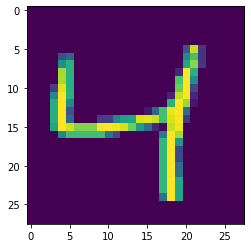

In [13]:
first_img=train_images[2]
first_img=np.array(first_img,dtype='float')
first_img.reshape((28,28))
plt.imshow(first_img)
plt.show()

If the image is 28*28, the image is flattened to capture the data into a single array. 

So if we flatten the image of dimensions 28*28, we would eventually get the flattened array of length 784(28 multiplies 28 = 784)

In [14]:
n_input=784
n_hidden1=256
n_hidden2=256
n_classes=10

weights={ 'h1':tf.Variable(tf.random.normal([n_input,n_hidden1])),
         'h2':tf.Variable(tf.random.normal([n_hidden1,n_hidden2])),
         'out': tf.Variable(tf.random.normal([n_hidden2,n_classes]))
         }

biases={ 'h1':tf.Variable(tf.random.normal([n_hidden1])),
         'h2':tf.Variable(tf.random.normal([n_hidden2])),
         'out': tf.Variable(tf.random.normal([n_classes]))
         }

In [15]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [16]:
pred=forward_propagation(train_images.shape[0],weights,biases)

InvalidArgumentError: ignored